# AIRBNB Price Prediction in Newyork City

In this kernel we are focusing Price Prediction of New York City Airbnb Open Data Airbnb listings and metrics in NYC, NY, USA (2019)for linear regression.

Data
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

This data contains 16 columns, 4852 unique values(samples). Imported all necessary files and libraries, We removed unnecessary data from the datset like last review, reviews per month and host name as they donot support the data required. We filled the null values with zero constant and did the visualization using seaborn, pyplot, matplotlib.

Variables
id: listing ID
name: name of the listing
host_id: host ID
host_name: name of the host
neighbourhood_group: location
neighbourhood: area
latitude: latitude coordinateslatitude: latitude coordinates
longitude: longitude coordinates
room_type: listing space type
price: price in dollars
minimum_nights: amount of nights minimum
number_of_reviews: number of reviews
last_review: latest review
reviews_per_month: number of reviews per month
calculated_host_listings_count: amount of listing per host
availability_365: number of days when listing is available for booking

We will perform Regression on this dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
my_data = pd.read_csv('NYC_AirBNB.csv')

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 30 columns):
Unnamed: 0                4852 non-null int64
id                        4852 non-null int64
log_price                 4852 non-null float64
property_type             4852 non-null object
room_type                 4852 non-null object
amenities                 4852 non-null object
accommodates              4852 non-null int64
bathrooms                 4838 non-null float64
bed_type                  4852 non-null object
cancellation_policy       4852 non-null object
cleaning_fee              4852 non-null object
city                      4852 non-null object
description               4852 non-null object
first_review              3833 non-null object
host_has_profile_pic      4814 non-null object
host_identity_verified    4814 non-null object
host_response_rate        3348 non-null object
host_since                4814 non-null object
instant_bookable          4852 non-null object
l

In [4]:
my_data.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,16553,44472,4.382027,Condominium,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,...,40.762239,-73.981589,Luxury bedroom in Times Square,Times Square/Theatre District,1,NaN,https://a0.muscache.com/im/pictures/101584608/...,10019,1.0,1.0
1,12555,7007348,5.075174,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,strict,...,40.677892,-73.992054,Stylish and bright one bedroom,Gowanus,17,98.0,https://a0.muscache.com/im/pictures/cc7d769d-9...,11231,1.0,2.0
2,15012,10283574,4.852030,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,...,40.741380,-73.998753,Sunny Chelsea Studio,Chelsea,6,93.0,https://a0.muscache.com/im/pictures/2a690ce6-2...,NaN,0.0,2.0
3,21502,1754527,5.010635,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,...,40.800331,-73.965090,BEAUTIFUL 1BR APT ON THE UPPER WEST,Upper West Side,49,96.0,NaN,10025,1.0,2.0
4,13431,16823953,4.317488,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,40.711386,-73.963529,1st floor room in the heart of Williamsburg,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/bc456a57-b...,11249,1.0,1.0


In [5]:
 def calculate_nullvalue(df):
    '''
        Calculating  percentage of null value present in our data set.
    '''
    
    missing_value = df.isnull().sum().to_frame()
    missing_value.columns = ['num_nullvalue']
    missing_value['percetage_missing'] = np.round(100 * (missing_value['num_nullvalue'] / df.shape[0]))
    missing_value.sort_values(by='num_nullvalue', ascending=False, inplace=True)

    return missing_value

In [6]:
num_nullvalue = calculate_nullvalue(my_data)
num_nullvalue

,num_nullvalue,percetage_missing
host_response_rate,1504,31.0
review_scores_rating,1093,23.0
first_review,1019,21.0
last_review,1015,21.0
thumbnail_url,358,7.0
zipcode,63,1.0
host_identity_verified,38,1.0
host_since,38,1.0
host_has_profile_pic,38,1.0
bathrooms,14,0.0


In [7]:
#Finding the missing values in the dataframe
my_data.isnull().sum()

Unnamed: 0                   0
id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   14
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1019
host_has_profile_pic        38
host_identity_verified      38
host_response_rate        1504
host_since                  38
instant_bookable             0
last_review               1015
latitude                     0
longitude                    0
name                         0
neighbourhood                0
number_of_reviews            0
review_scores_rating      1093
thumbnail_url              358
zipcode                     63
bedrooms                     2
beds                        12
dtype: int64

In [8]:
Conversion = {'Condo':['Timeshare','Loft','Guest suite','Condominium','Serviced apartment'],
         'Housing':['Vacation home','Townhouse','Casa particular','Villa','In-law'],
         'Hotel type 1':['Dorm','Guesthouse','Hostel'],
         'Hotel type 2':['Bed & Breakfast','Boutique hotel'],
         'Other':['Island','Yurt','Hut','Treehouse',
                  'Earth House','Tipi','Train','Parking Space','Lighthouse',
                 'Cabin','Camper/RV','Bungalow','Cave','Castle','Chalet','Boat','Tent']
        }
Conversion_real = {i : k for k, v in Conversion.items() for i in v}
my_data['property_type'].replace(Conversion_real,inplace =True)

Text(0.5, 1.0, 'Room Type vs Price')

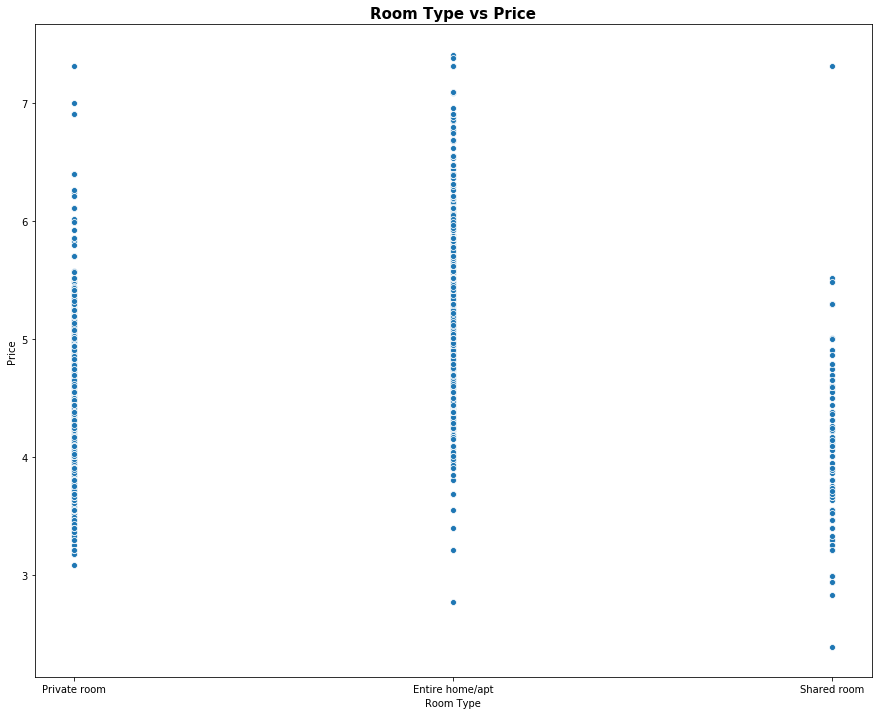

In [9]:

plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='log_price', data=my_data)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price",size=15, weight='bold')

In [10]:
top10_freq_neighbourhood=my_data.neighbourhood.value_counts().head(10)
print(top10_freq_neighbourhood)

Williamsburg          442
Bedford-Stuyvesant    296
Bushwick              248
Upper West Side       210
Harlem                208
Upper East Side       185
Crown Heights         184
Hell's Kitchen        178
Lower East Side       137
East Harlem           137
Name: neighbourhood, dtype: int64


In [11]:
top10_freq_neighbourhood_data=my_data[my_data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
top10_freq_neighbourhood_data

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
3,21502,1754527,5.010635,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,...,40.800331,-73.965090,BEAUTIFUL 1BR APT ON THE UPPER WEST,Upper West Side,49,96.0,NaN,10025,1.0,2.0
4,13431,16823953,4.317488,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,40.711386,-73.963529,1st floor room in the heart of Williamsburg,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/bc456a57-b...,11249,1.0,1.0
6,5389,2636988,4.262680,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Heatin...",2,1.0,Real Bed,flexible,...,40.694177,-73.918841,Entire furnished apartment in Brooklyn,Bushwick,5,92.0,https://a0.muscache.com/im/pictures/ba4b3477-1...,11221,1.0,1.0
7,21857,20965965,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,...,40.803351,-73.956142,Cozy and Neat Pre-War Apartment,Harlem,0,NaN,https://a0.muscache.com/im/pictures/977a8e0f-a...,10026,1.0,1.0
10,29298,2182851,3.806662,Apartment,Private room,"{""Pets live on this property"",Cat(s),""Smoke de...",2,1.0,Real Bed,flexible,...,40.689874,-73.914330,"Large, cozy, spacious room",Bushwick,0,NaN,https://a0.muscache.com/im/pictures/ef118ee9-1...,11221,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,24714,21023168,4.867534,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",5,1.0,Real Bed,flexible,...,40.682395,-73.935966,Furnished BrownStone Apartment,Bedford-Stuyvesant,49,95.0,https://a0.muscache.com/im/pictures/0dad2ee4-0...,11233,2.0,4.0
4843,8047,11145641,4.276666,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,...,40.693702,-73.931041,Charming private room & sunny deck!,Bedford-Stuyvesant,36,90.0,NaN,11221,1.0,1.0
4845,17804,14139651,3.688879,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,Essentials}",2,1.0,Real Bed,flexible,...,40.683968,-73.951364,Bright & cozy room in Brooklyn!,Bedford-Stuyvesant,0,NaN,https://a0.muscache.com/im/pictures/92226026/a...,11216,1.0,1.0
4846,5608,12524258,4.094345,Apartment,Private room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",4,1.0,Real Bed,moderate,...,40.681610,-73.907956,Guestroom w/ 2 beds 20 mins to NYC,Bushwick,205,97.0,https://a0.muscache.com/im/pictures/9733510/63...,11207,1.0,2.0


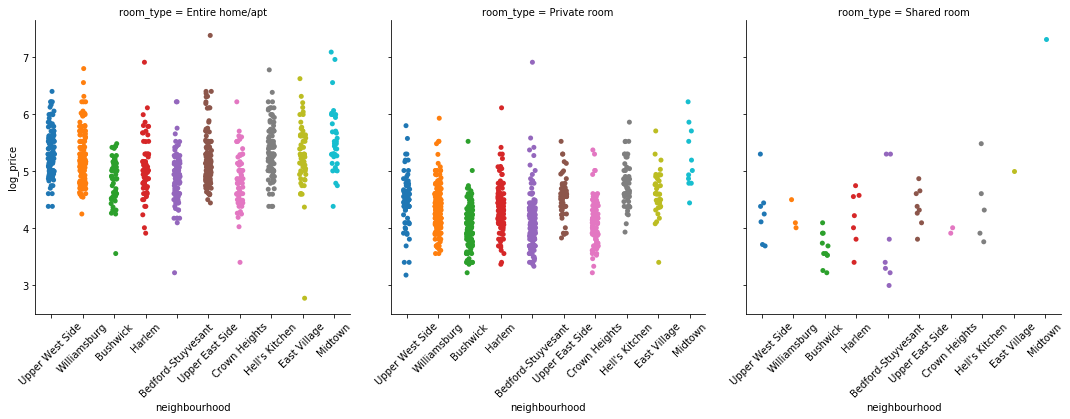

In [12]:
t=sns.catplot(x="neighbourhood", y="log_price", col="room_type", data=top10_freq_neighbourhood_data)
t.set_xticklabels(rotation=45)

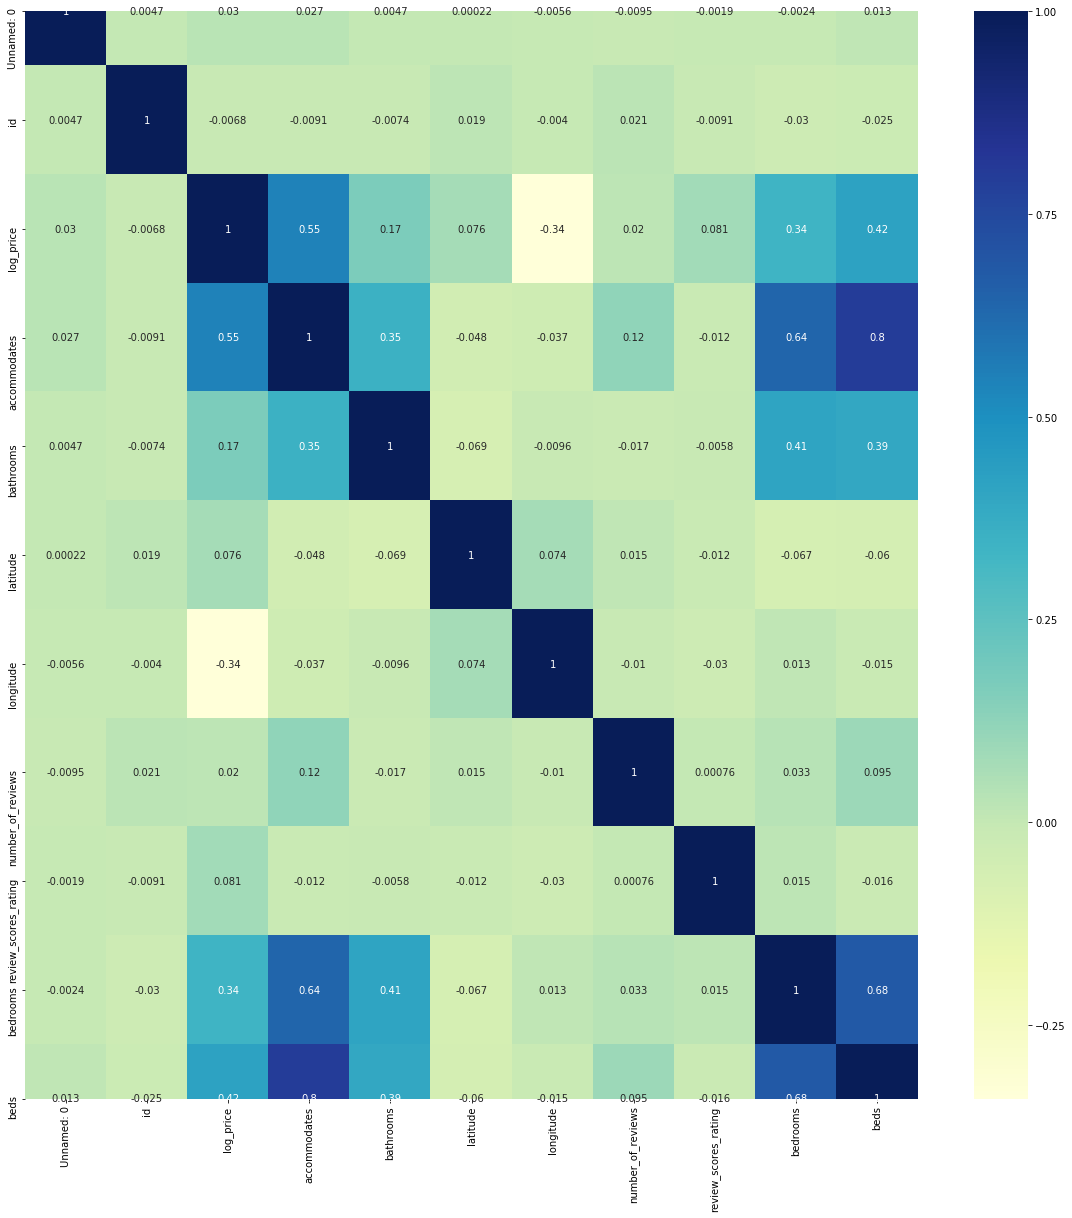

In [13]:
plt.figure(figsize=(20,20)) 
sns.heatmap(my_data.corr(), annot=True, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294AF9ECCC8>,
      dtype=object)

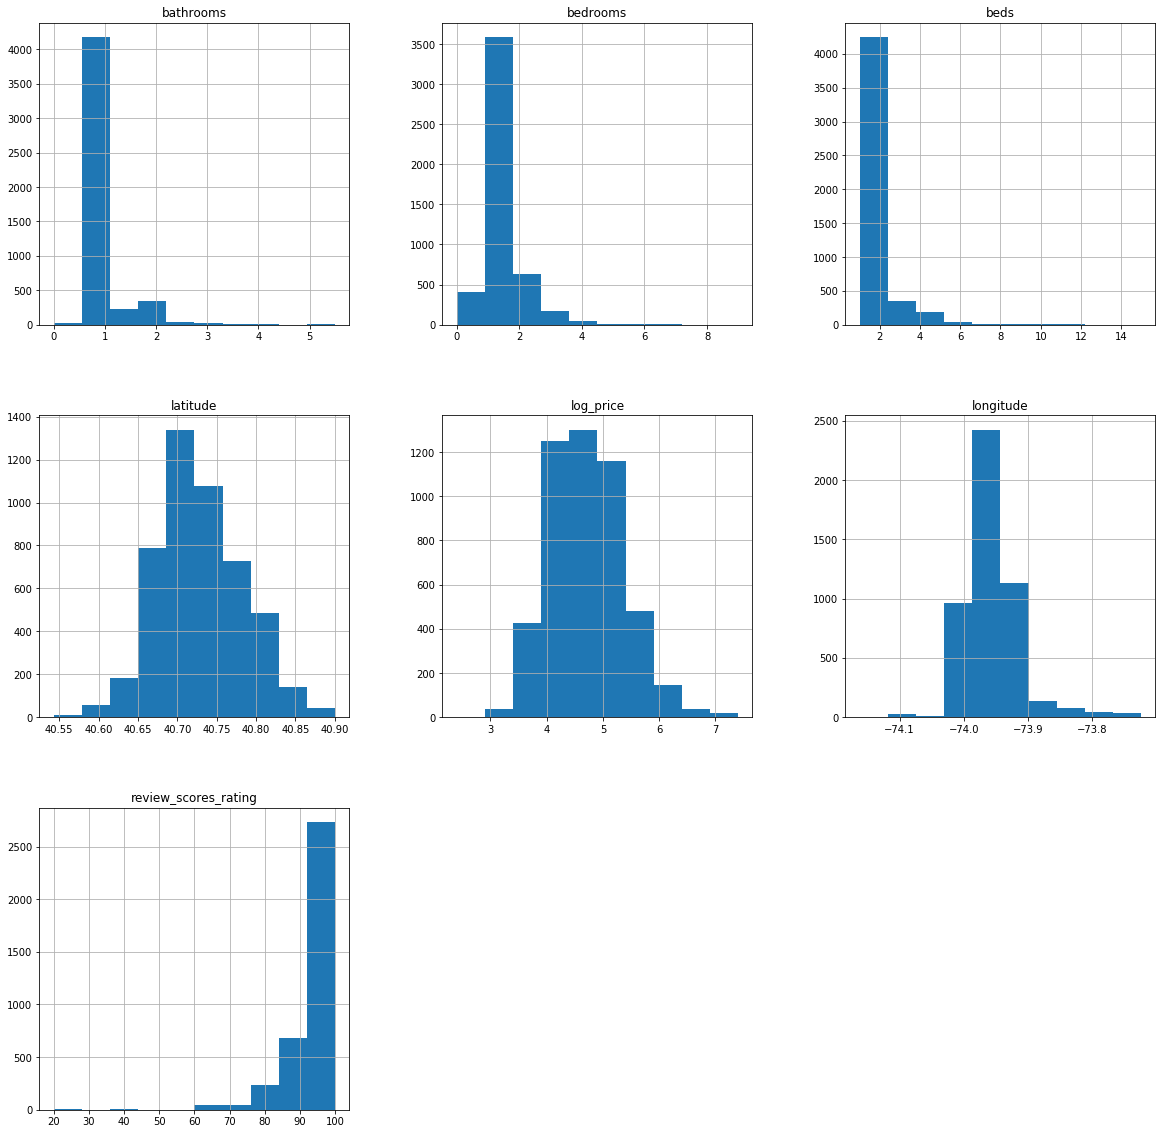

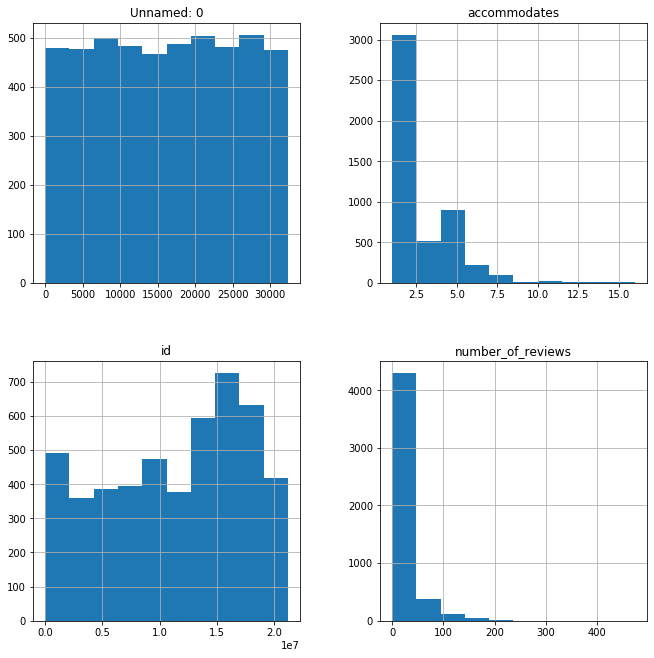

In [14]:
my_data[my_data.dtypes[(my_data.dtypes=="float")].index.values].hist(figsize=[20,20])
my_data[my_data.dtypes[(my_data.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [15]:
my_data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4852.0,1.623937e+04,9.325224e+03,4.000000,8.123500e+03,1.633650e+04,2.442150e+04,3.234800e+04
id,4852.0,1.133776e+07,6.080574e+06,3152.000000,6.213140e+06,1.236683e+07,1.649103e+07,2.117444e+07
log_price,4852.0,4.708381e+00,6.594890e-01,2.397895,4.248495e+00,4.649176e+00,5.164786e+00,7.408531e+00
accommodates,4852.0,2.778648e+00,1.800746e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,4838.0,1.122261e+00,3.699294e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+00
latitude,4852.0,4.072880e+01,5.336419e-02,40.542680,4.069014e+01,4.072289e+01,4.076384e+01,4.090080e+01
longitude,4852.0,-7.395477e+01,4.202628e-02,-74.162537,-7.398367e+01,-7.395690e+01,-7.393956e+01,-7.372349e+01
number_of_reviews,4852.0,1.793157e+01,3.270683e+01,0.000000,1.000000e+00,5.000000e+00,2.000000e+01,4.740000e+02
review_scores_rating,3759.0,9.349322e+01,8.581227e+00,20.000000,9.100000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,4850.0,1.157938e+00,6.998541e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00


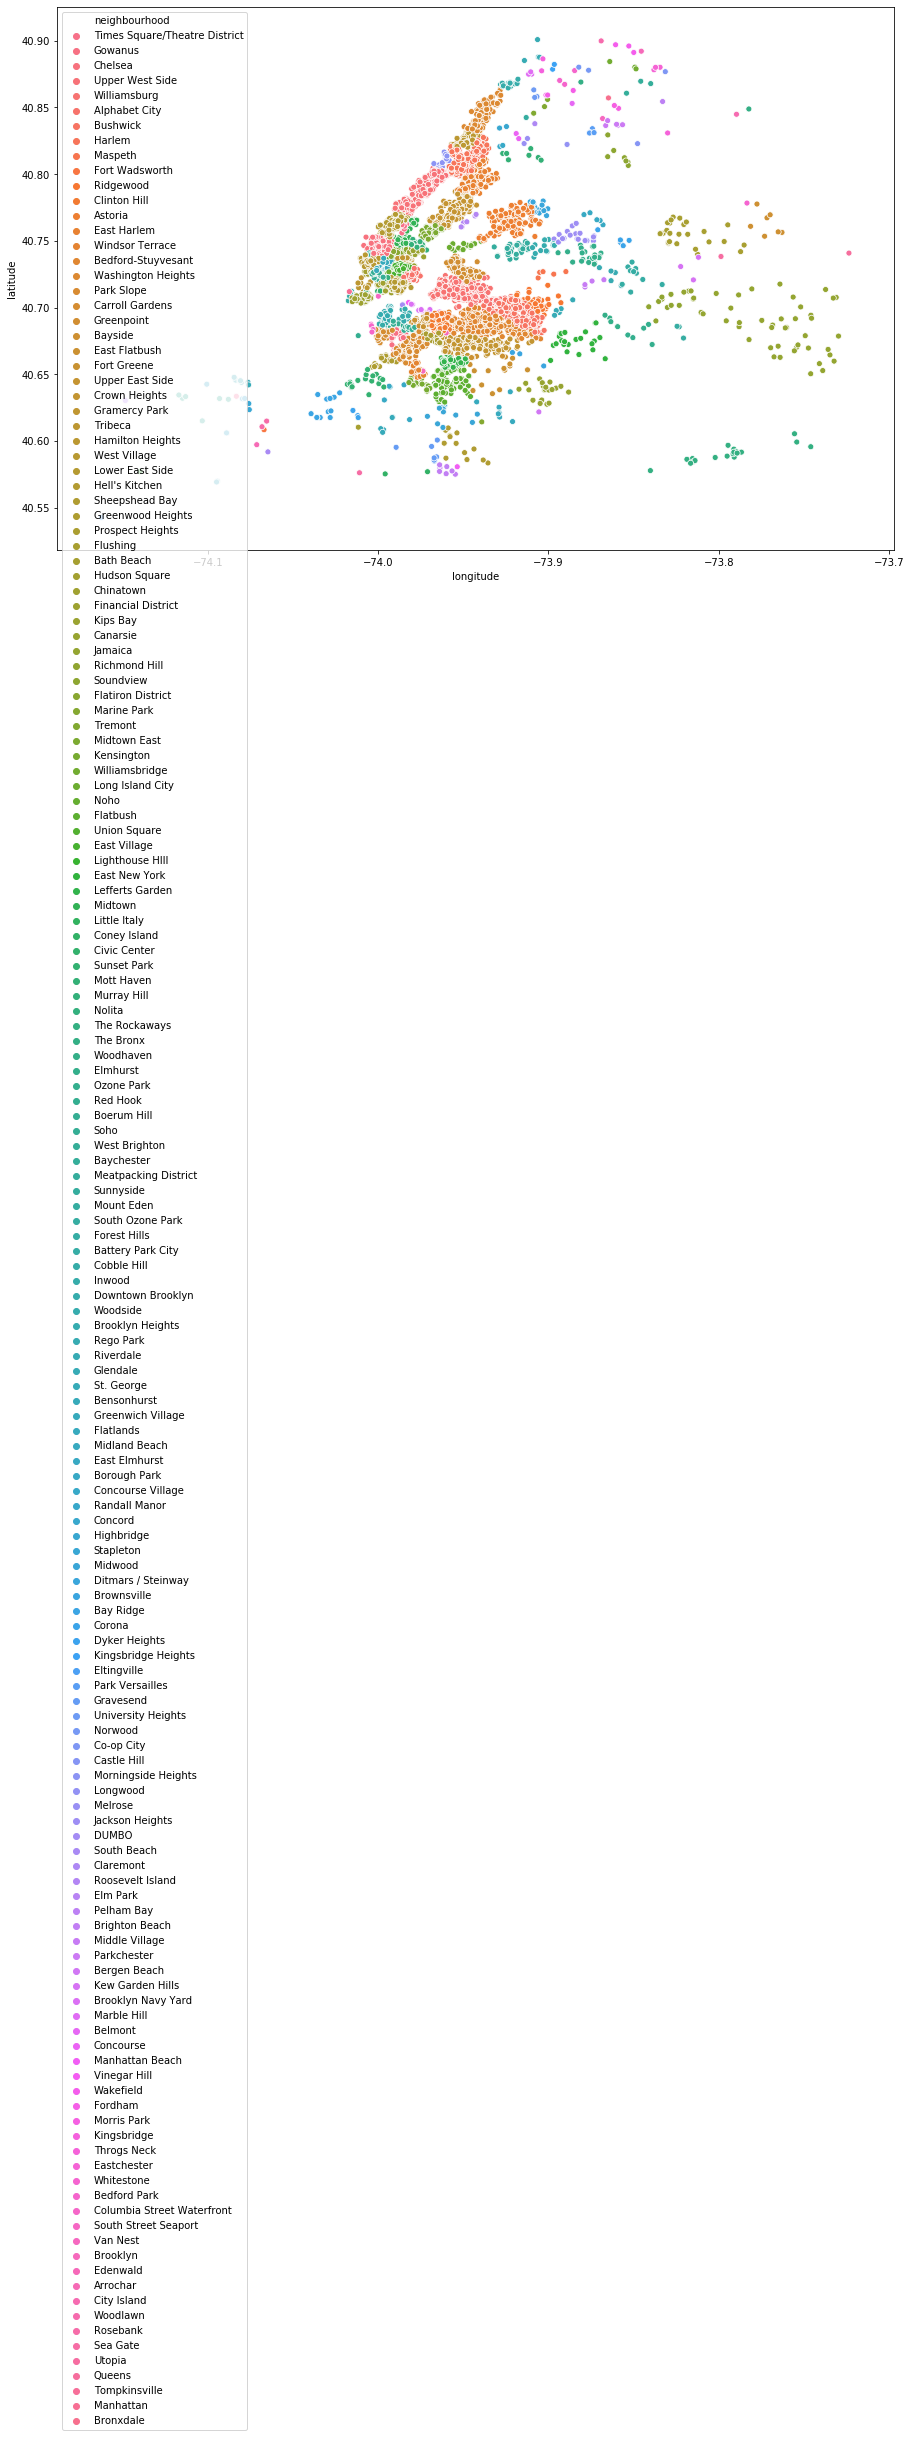

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(my_data.longitude,my_data.latitude,hue=my_data.neighbourhood)
plt.ioff()

In [17]:
#imputing values with mean, median and mode
#mode is 1.0
my_data['bathrooms'].fillna(my_data['bathrooms'].mode()[0],inplace=True)
#mean is 93.50
my_data['review_scores_rating'].fillna(my_data['review_scores_rating'].mean(),inplace=True)
#mode is 1 bedroom
my_data['bedrooms'].fillna(my_data['bedrooms'].mode()[0],inplace=True)
#mode is 1 bed
my_data['beds'].fillna(my_data['beds'].mode()[0],inplace=True)

In [18]:
#Checking the number of null count
my_data.isnull().sum()

Unnamed: 0                   0
id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1019
host_has_profile_pic        38
host_identity_verified      38
host_response_rate        1504
host_since                  38
instant_bookable             0
last_review               1015
latitude                     0
longitude                    0
name                         0
neighbourhood                0
number_of_reviews            0
review_scores_rating         0
thumbnail_url              358
zipcode                     63
bedrooms                     0
beds                         0
dtype: int64

In [19]:
#Removing the null values from is_null
Remove_null=pd.DataFrame({"val":my_data['zipcode'].isnull()})
my_data=my_data[Remove_null['val']==False]

In [20]:
my_data=my_data.drop(['Unnamed: 0','amenities','bed_type','city','description','first_review',
                        'host_has_profile_pic','host_identity_verified','host_response_rate','host_since'
                       ,'last_review','name','neighbourhood','thumbnail_url','zipcode','id'],axis=1)

In [21]:
my_data.isnull().sum()

log_price               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [22]:
my_data.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,4.705982,2.767592,1.121529,40.728855,-73.954704,17.957194,93.483237,1.156609,1.530591
std,0.658785,1.785157,0.369942,0.053468,0.042065,32.749212,7.547036,0.697373,1.000498
min,2.397895,1.000000,0.000000,40.542680,-74.162537,0.000000,20.000000,0.000000,1.000000
25%,4.248495,2.000000,1.000000,40.690093,-73.983666,1.000000,93.000000,1.000000,1.000000
50%,4.624973,2.000000,1.000000,40.722996,-73.956807,5.000000,93.493216,1.000000,1.000000
75%,5.164786,4.000000,1.000000,40.763896,-73.939605,20.000000,98.000000,1.000000,2.000000
max,7.408531,16.000000,5.500000,40.900803,-73.723488,474.000000,100.000000,9.000000,15.000000


In [23]:
#categorical=['property_type','room_type','cancellation_policy','instant_bookable']
my_data=pd.concat((my_data,pd.get_dummies(my_data['property_type'])),axis=1)
my_data=pd.concat((my_data,pd.get_dummies(my_data['room_type'])),axis=1)
my_data=pd.concat((my_data,pd.get_dummies(my_data['cancellation_policy'])),axis=1)
my_data=pd.concat((my_data,pd.get_dummies(my_data['instant_bookable'])),axis=1)
my_data=pd.concat((my_data,pd.get_dummies(my_data['cleaning_fee'])),axis=1)

In [24]:
my_data=my_data.drop(['property_type','room_type','cancellation_policy','instant_bookable','cleaning_fee'],axis=1)

In [25]:
my_data.isnull().sum()

log_price               0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
Apartment               0
Condo                   0
Hotel type 1            0
Hotel type 2            0
House                   0
Housing                 0
Other                   0
Entire home/apt         0
Private room            0
Shared room             0
flexible                0
moderate                0
strict                  0
Instant Booking         0
No Instant Booking      0
Cleaning Fee Req        0
No Cleaning Fee         0
dtype: int64

In [26]:
target = my_data['log_price']
target_df = pd.DataFrame(target)
target_df.head()

,log_price
0,4.382027
1,5.075174
3,5.010635
4,4.317488
5,5.416100


In [27]:
features_df=my_data.drop(['log_price'],axis=1)
features_df.head()

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Apartment,Condo,...,Entire home/apt,Private room,Shared room,flexible,moderate,strict,Instant Booking,No Instant Booking,Cleaning Fee Req,No Cleaning Fee
0,1,1.0,40.762239,-73.981589,1,93.493216,1.0,1.0,0,1,...,0,1,0,1,0,0,0,1,0,1
1,3,1.0,40.677892,-73.992054,17,98.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,4,1.0,40.800331,-73.965090,49,96.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
4,2,1.0,40.711386,-73.963529,0,93.493216,1.0,1.0,1,0,...,0,1,0,1,0,0,1,0,0,1
5,5,1.0,40.726874,-73.979947,0,93.493216,2.0,2.0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [28]:
from sklearn.model_selection import train_test_split
X_train_old, X_test_old, y_train, y_test = train_test_split(features_df,target_df, test_size=0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_old)
X_test = scaler.transform(X_test_old)

In [30]:
X_train = pd.DataFrame(X_train, columns = X_train_old.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (3591, 25)
Train dataset dimensionality: (3591, 1)


In [31]:
X_test = pd.DataFrame(X_test, columns = X_test_old.columns)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Test dataset dimensionality: (1198, 25)
Train dataset dimensionality: (1198, 1)


## Bagging

### Bootstrapping - resample method that repetedly drawn sample form smaller data to form smaller data set.

# Bagging can be defined as Bootstrapping + Aggrgation  and it is an ensemble method in which we first bootstrap our sample data and train them . After that , we aggregate them with equi weights 

# Model 1 Ridge Regressor with Bagging ##

In [32]:
# Using grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
parameters_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

_grid_search_ = GridSearchCV(BaggingRegressor(), parameters_grid, cv=5, return_train_score=True)
_grid_search_.fit(X_train, y_train)
print("Best parameters: {}".format(_grid_search_.best_params_))
print("Best cross-validation score: {:.2f}".format(_grid_search_.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.67


In [33]:
# Using grid Search to find best parameter for model Ridge Regressor
from  sklearn.linear_model import Ridge
parameters_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
_grid_search_ = GridSearchCV(Ridge(), parameters_grid, cv=5, return_train_score=True)
_grid_search_.fit(X_train, y_train)
print("Best parameters: {}".format(_grid_search_.best_params_))
print("Best cross-validation score: {:.2f}".format(_grid_search_.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.58


In [34]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
bag_ridge_reg = BaggingRegressor(ridge, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0)

bag_ridge_reg.fit(X_train, y_train)
y_pred = bag_ridge_reg.predict(X_test)

print('Score after applying Bagging on Ridge Regressor on Train data set: {:.2f}'.format(bag_ridge_reg.score(X_train, y_train)))
print('Score after applying Bagging on Ridge Regressor on Test data set: {:.2f}'.format(bag_ridge_reg.score(X_test, y_test)))

Score after applying Bagging on Ridge Regressor on Train data set: 0.59
Score after applying Bagging on Ridge Regressor on Test data set: 0.56


# Model 2 Decision Tree with Bagging

In [35]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters_grid = {'max_depth': np.arange(1, 10)}
_grid_search_ = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters_grid, cv=5, return_train_score=True)
_grid_search_.fit(X_train, y_train)
print("Best parameters: {}".format(_grid_search_.best_params_))
print("Best cross-validation score: {:.2f}".format(_grid_search_.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.61


In [36]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
parameters_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

_grid_search_ = GridSearchCV(BaggingRegressor(), parameters_grid, cv=5, return_train_score=True)
_grid_search_.fit(X_train, y_train)
print("Best parameters: {}".format(_grid_search_.best_params_))
print("Best cross-validation score: {:.2f}".format(_grid_search_.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.67


In [37]:
# building the bagging model for Decision Tree Regressor using the best parameters
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 6, random_state=0)
bag_dectree_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0)

bag_dectree_reg.fit(X_train, y_train)
y_pred = bag_dectree_reg.predict(X_test)

print('Score after applying Bagging on Decision Tree Regressor on Train data Set: {:.2f}'.format(bag_dectree_reg.score(X_train, y_train)))
print('Score after applying Bagging on Decision Tree Regressor on Test data Set: {:.2f}'.format(bag_dectree_reg.score(X_test, y_test)))

Score after applying Bagging on Decision Tree Regressor on Train data Set: 0.70
Score after applying Bagging on Decision Tree Regressor on Test data Set: 0.65


# Pasting

# In pasting sampling  is done without replacement.Furthermore, bootstrap is set  to false in pasting.

## Model 1- Lasso Regressor with Pasting

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
_param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

__grid__search = GridSearchCV(BaggingRegressor(), _param_grid, cv=5, return_train_score=True)
__grid__search.fit(X_train, y_train)
print("Best parameters: {}".format(__grid__search.best_params_))
print("Best cross-validation score: {:.3f}".format(__grid__search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.670


In [39]:
from  sklearn.linear_model import Lasso
lasso_param_ = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
__grid__search = GridSearchCV(Lasso(), lasso_param_, cv=5, return_train_score=True)
__grid__search.fit(X_train, y_train)
print("Best parameters: {}".format(__grid__search.best_params_))
print("Best cross-validation score: {:.3f}".format(__grid__search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.581


In [40]:
lasso = Lasso(alpha=0.01)
pas_lasso_reg = BaggingRegressor(lasso, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

pas_lasso_reg.fit(X_train, y_train)
y_pred = pas_lasso_reg.predict(X_test)

print('Score after aplying Pasting on Lasso Regressor on Train Set: {:.2f}'.format(pas_lasso_reg.score(X_train, y_train)))
print('Score after pasting Pasting on Lasso Regressor on Test Set: {:.2f}'.format(pas_lasso_reg.score(X_test, y_test)))

Score after aplying Pasting on Lasso Regressor on Train Set: 0.52
Score after pasting Pasting on Lasso Regressor on Test Set: 0.49


# Model 2 -  Knn Regressor with Pasting

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors' : range(1,20), 'p': [1,2], 'weights': ['distance','uniform']}

grid_knn_rgr = GridSearchCV(KNeighborsRegressor(), param_grid = knn_param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_knn_rgr.fit(X_train, y_train)

print("Best parameters: {}".format(grid_knn_rgr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn_rgr.best_score_))

Best parameters: {'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.59


In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

bag_reg_knn2 = BaggingRegressor(KNeighborsRegressor(5, p=1, weights= 'distance'),max_features= 9, max_samples=500, n_estimators= 200, random_state=0, bootstrap = False)
bag_reg_knn2.fit(X_train, y_train)
y_pred_knn2 = bag_reg_knn2.predict(X_test)

print('Train score after applying pasting in KNN Regressor: {:.2f}%'.format(bag_reg_knn2.score(X_train, y_train)*100))
print('Test score after applying pasting in KNN Regresso: {:.2f}%'.format(bag_reg_knn2.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn2)))
print("r2_Score:",r2_score(y_test, y_pred_knn2))

Train score after applying pasting in KNN Regressor: 66.03%
Test score after applying pasting in KNN Regresso: 55.84%

MAE: 0.32189785453260594
MSE: 0.19054611432352225
RMSE: 0.43651588095225385
r2_Score: 0.5584223204113332


# Adaboosting

## Adaboost try to fit a sequence of weak learner on reaptedly modified data set

# Model 1 - KNN Regressor with Adaboost

In [43]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
parameters_grid = {'n_estimators': [50,100,200],
              'learning_rate': [.01, .05, .1, 1]}

__grid_search__ = GridSearchCV(AdaBoostRegressor(random_state = 0), parameters_grid, cv=5, return_train_score=True)
__grid_search__.fit(X_train, y_train)
print("Best parameters: {}".format(__grid_search__.best_params_))
print("Best cross-validation score: {:.2f}".format(__grid_search__.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score: 0.58


In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)
print('KNN regressor score on Train Set score: {:.2f}'.format(knn_reg.score(X_train, y_train)))
print('KNN regressor score on Test Set score: {:.2f}'.format(knn_reg.score(X_test, y_test)))

KNN regressor score on Train Set score: 0.77
KNN regressor score on Test Set score: 0.50


In [45]:
from sklearn.ensemble import AdaBoostRegressor
knn_ada_reg = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=3), n_estimators=100,  learning_rate=0.05, random_state=0)
knn_ada_reg.fit(X_train, y_train)
y_pred = knn_ada_reg.predict(X_test)
print('KNN regressor score on Train Set after applying Adaboost Boosting: {:.3f}'.format(knn_ada_reg.score(X_train, y_train)))
print('KNN regressor score on Test Set after applying Adaboost Boosting: {:.3f}'.format(knn_ada_reg.score(X_test, y_test)))

KNN regressor score on Train Set after applying Adaboost Boosting: 0.869
KNN regressor score on Test Set after applying Adaboost Boosting: 0.488


# Model 2 - Decision Tree Regressor 

In [46]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
_parameter_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid__search = GridSearchCV(AdaBoostRegressor(random_state = 0), _parameter_grid, cv=5, return_train_score=True)
grid__search.fit(X_train, y_train)
print("Best parameters: {}".format(grid__search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid__search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best cross-validation score: 0.58


In [47]:
from sklearn.tree import DecisionTreeRegressor
dectr_reg = DecisionTreeRegressor(max_depth = 6, random_state=0)
dectr_reg.fit(X_train, y_train)
y_pred = dectr_reg.predict(X_test)

print('Decision tree regressor score on Train Set score: {:.2f}'.format(dectr_reg.score(X_train, y_train)))
print('Decision tree regressor score on Test Set score: {:.2f}'.format(dectr_reg.score(X_test, y_test)))


Decision tree regressor score on Train Set score: 0.70
Decision tree regressor score on Test Set score: 0.60


In [48]:

from sklearn.ensemble import AdaBoostRegressor
ada_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=100,  learning_rate=0.05, random_state=0)
ada_regr.fit(X_train, y_train)

print('Decision tree regressor score on Train Set after Adaboost Boosting: {:.2f}'.format(ada_regr.score(X_train, y_train)))
print('Decision tree regressor score on Test Set after Adaboost Boosting: {:.2f}'.format(ada_regr.score(X_test, y_test)))

Decision tree regressor score on Train Set after Adaboost Boosting: 0.73
Decision tree regressor score on Test Set after Adaboost Boosting: 0.64


# Gradient Boosting 

In [49]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbrt = GradientBoostingRegressor(random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1],'max_depth': np.arange(1, 6)}
__grid_search__=GridSearchCV(gbrt,param_grid,cv=5,return_train_score=True)
__grid_search__.fit(X_train, y_train)
print("Best Parameters: {}".format(__grid_search__.best_params_))
print("Best cross-validation score: {:.2f}".format(__grid_search__.best_score_))

Best Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
Best cross-validation score: 0.66


In [50]:
# building the model with best parameters
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.5, max_depth = 2, n_estimators=50)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print("Score after applying Gradient Boosting on Train Set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Score after applying  Gradient Boosting on Test Set: {:.3f}".format(gbrt.score(X_test, y_test)))

Score after applying Gradient Boosting on Train Set: 0.730
Score after applying  Gradient Boosting on Test Set: 0.655


# Prinicipal Component Analysis


## PCA technique is use to reduce the dimensionality of a data set consisting of many variables correlated to each other.

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,random_state = 0)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

## Checking after PCA how many column get reduced

In [52]:
print('X_train shape',X_train.shape)
print('X_train_reduced shape',X_train_reduced.shape)

X_train shape (3591, 25)
X_train_reduced shape (3591, 8)


# Scaling the data

In [53]:
mm = MinMaxScaler()
X_train_pca= mm.fit_transform(X_train_reduced)
X_test_pca = mm.transform(X_test_reduced)

# Dummy list will use if required.

In [54]:
train_score_pca=[]
test_score_pca=[] 
models_pca =[]

# Model -1  KNN regressor after PCA Technique

In [55]:
np.random.seed(0)
    
x_range_1 = range(1,30,1)
tuned_parameters=dict(n_neighbors=x_range_1)

#Grid model
knn_reg_pca = KNeighborsRegressor()
grid_knn_pca=GridSearchCV(knn_reg_pca,tuned_parameters,cv=5,return_train_score=True)
grid_model_knn_pca=grid_knn_pca.fit(X_train_pca,y_train)

print(grid_model_knn_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_knn_pca.best_score_))

{'n_neighbors': 7}
validation score: 0.53


In [56]:
#General model
knn_pca=KNeighborsRegressor(n_neighbors=9)
knn_model_pca=knn_pca.fit(X_train_pca,y_train)
print('Train score: {}'.format(knn_model_pca.score(X_train_pca,y_train)))
print('Test score: {}'.format(knn_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(knn_model_pca.score(X_train_pca,y_train))
test_score_pca.append(knn_model_pca.score(X_test_pca,y_test))

Train score: 0.6375807251169314
Test score: 0.5246936528801134


In [57]:
#calculating the accuracies
knn_accuracies_pca = cross_val_score(estimator = knn_model_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies_pca.mean()*100))

Accuracy: 53.17 %


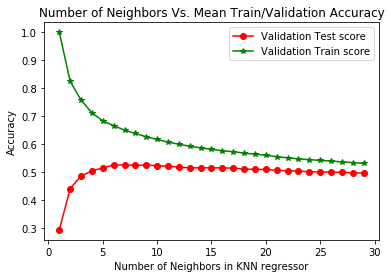

In [58]:
#visualizing the train and test accuracy score for KNN Regressor
import matplotlib.pyplot as plt
views = pd.DataFrame(grid_knn_pca.cv_results_)
plt.plot(views['param_n_neighbors'],views['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(views['param_n_neighbors'],views['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

In [59]:
#train and test accuracy score for KNN Regressor after running PCA
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_pca, y_train)
print('Train score on best parameters for KNN Regressor {}'.format(knn.score(X_train_pca,y_train)))
print('Test score on best parameters for KNN Regressor {}'.format(knn.score(X_test_pca,y_test)))

Train score on best parameters for KNN Regressor 0.6570193928545962
Test score on best parameters for KNN Regressor 0.5201252133003174


# Model 2 -Linear Regression after PCA 

In [60]:

#train and test accuracy score for linear regression after running PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lreg = LinearRegression()
#scaled train test
lreg.fit(X_train_pca, y_train)
print('Training score for regression model: {}'.format(lreg.score(X_train_pca, y_train)))
print('Testing score for regression model: {}'.format(lreg.score(X_test_pca, y_test)))
print('R-squared score (training): {:.2f}\n'.format(lreg.score(X_train_pca, y_train)))
print('R-squared score (test): {:.2f}'.format(lreg.score(X_test_pca, y_test)))
train_score_pca.append(lreg.score(X_train_pca, y_train))
test_score_pca.append(lreg.score(X_test_pca, y_test))

Training score for regression model: 0.4594824287389822
Testing score for regression model: 0.43657755698958867
R-squared score (training): 0.46

R-squared score (test): 0.44


In [61]:
#calculating the accuracies
lnr_accuracies_pca = cross_val_score(estimator = lreg, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lnr_accuracies_pca.mean()*100))

Accuracy: 45.56 %


# Model 3 - Ridge regressor after PCA

In [62]:
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge_pca = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge_pca=GridSearchCV(ridge_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge_pca=grid_ridge_pca.fit(X_train_pca,y_train)

print("Best parameters: {}".format(grid_model_ridge_pca.best_params_))
print('Cross validation score: {:0.2f}'.format( grid_model_ridge_pca.best_score_))

Best parameters: {'alpha': 1}
Cross validation score: 0.45


In [63]:
#General model
ridge_1_pca=Ridge(alpha=0.1)
ridge_model_pca=ridge_1_pca.fit(X_train_pca,y_train)
print('Training score for Ridge regression model: {}'.format(ridge_model_pca.score(X_train_pca,y_train)))
print('Testing score for Ridge regression model: {}'.format(ridge_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(ridge_model_pca.score(X_train_pca,y_train))
test_score_pca.append(ridge_model_pca.score(X_test_pca,y_test))

Training score for Ridge regression model: 0.45948226719811064
Testing score for Ridge regression model: 0.43659616180333627


In [64]:
#calculating the accuracies
ridr_accuracies_pca = cross_val_score(estimator = ridge_model_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(ridr_accuracies_pca.mean()*100))

Accuracy: 45.56 %


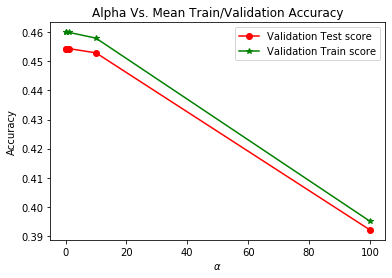

In [65]:
#visualizing the train and test accuracy score for Ridge regression
import matplotlib.pyplot as plt
vector = pd.DataFrame(grid_model_ridge_pca.cv_results_)
plt.plot(vector['param_alpha'],vector['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(vector['param_alpha'],vector['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# Model 4 Lasso Regression after PCA

In [66]:
#list the best parameter value for lasso regressor
from  sklearn.linear_model import Lasso
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso_pca = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso_pca=GridSearchCV(lasso_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso_pca=grid_lasso_pca.fit(X_train_pca,y_train)

print("Best parameters: {}".format(grid_model_lasso_pca.best_params_))
print('Best Crossvalidation score: {:0.2f}'.format( grid_model_lasso_pca.best_score_))

Best parameters: {'alpha': 0.01}
Best Crossvalidation score: 0.42


In [67]:
#General model
lasso_1_pca=Lasso(alpha=0.01, tol=0.1)
lasso_model_pca=lasso_1_pca.fit(X_train_pca,y_train)
print('Train score on best parameters for Lasso Regressor: {}'.format(lasso_model_pca.score(X_train_pca,y_train)))
print('Test score on best parameters for Lasso Regressor: {}'.format(lasso_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(lasso_model_pca.score(X_train_pca,y_train))
test_score_pca.append(lasso_model_pca.score(X_test_pca,y_test))

Train score on best parameters for Lasso Regressor: 0.42537317346395176
Test score on best parameters for Lasso Regressor: 0.40669138836971286


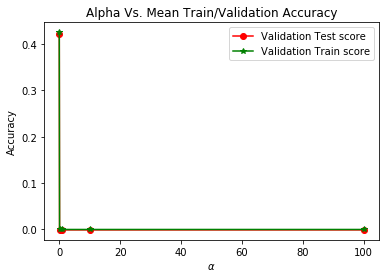

In [68]:
#visualizing the train and test accuracy score for lasso regression
import matplotlib.pyplot as plt
vis_results = pd.DataFrame(grid_lasso_pca.cv_results_)
plt.plot(vis_results['param_alpha'],vis_results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(vis_results['param_alpha'],vis_results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# Model 5 -Polynomial Regerssion after PCA

In [69]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
regressor = LinearRegression()
for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly_pca = poly.fit_transform(X_train_pca)
    X_test_poly_pca = poly.transform(X_test_pca)
    regressor.fit(X_train_poly_pca, y_train)
    train_score_list.append(regressor.score(X_train_poly_pca, y_train))
    test_score_list.append(regressor.score(X_test_poly_pca, y_test))
    
train = [sum(train_score_list)/len(train_score_list)]
test = [sum(test_score_list)/len(test_score_list)]
print(train)
print(test)

[0.5509409687032404]
[0.5029318211353652]


# Plotting Accuracy graph for Polynomial Regression after 

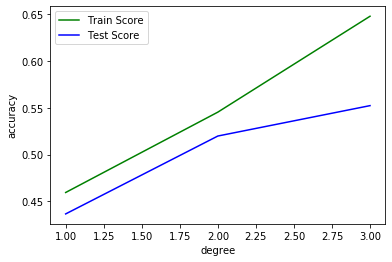

In [70]:
x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

# Model 5 - Support Vector Machine after PCA

In [71]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
_paramtr_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), _paramtr_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 100}
Best cross-validation score: 0.55


#  Linear SVM after PCA 

In [72]:
ln_svr = LinearSVR(C=10).fit(X_train_pca, y_train)
print('Train score on best parameters for LinearSVR - {}'.format(ln_svr.score(X_train_pca,y_train)))
print('Test score on best parameters for LinearSVR - {}'.format(ln_svr.score(X_test_pca,y_test)))

Train score on best parameters for LinearSVR - 0.4565816063539583
Test score on best parameters for LinearSVR - 0.43280524491002903


In [73]:
#calculating the accuracy
ln_svr_accuracy = cross_val_score(estimator = ln_svr, X = X_train_pca, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(ln_svr_accuracy.mean()*100))

Accuracy: 45.17 %


# Kernel(Linear)SVM  after PCA

In [74]:
kl_svm = SVR(kernel='linear', C=10).fit(X_train_pca, y_train)
print('Train score on best parameters for SVR kernel - Linear {}'.format(kl_svm.score(X_train_pca,y_train)))
print('Test score on best parameters for SVR kernel - Linear {}'.format(kl_svm.score(X_test_pca,y_test)))

Train score on best parameters for SVR kernel - Linear 0.45574929544318354
Test score on best parameters for SVR kernel - Linear 0.42599964884893393


In [75]:
#calculating the accuracy
kl_svm_accuracy = cross_val_score(estimator = kl_svm, X = X_train_pca, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(kl_svm_accuracy.mean()*100))

Accuracy: 45.20 %


# Kernel(RBF) SVM after PCA

In [76]:
krbf_svm = SVR(kernel='rbf', gamma=100, C=10).fit(X_train_pca, y_train)
print('Train score on best parameters for SVR kernel - rbf {}'.format(krbf_svm.score(X_train_pca,y_train)))
print('Test score on best parameters for SVR kernel - rbf {}'.format(krbf_svm.score(X_test_pca,y_test)))

Train score on best parameters for SVR kernel - rbf 0.6782168760741613
Test score on best parameters for SVR kernel - rbf 0.5401128539537601


In [77]:
#calculating the accuracy
krbf_svm_accuracy = cross_val_score(estimator = krbf_svm, X = X_train_pca, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(krbf_svm_accuracy.mean()*100))

Accuracy: 55.19 %


# Kernel SVM (Poly) after PCA

In [78]:
klp_svvm = SVR(kernel='poly', degree=3, C=10).fit(X_train_pca, y_train)
print('Train score on best parameters for SVR kernel - poly {}'.format(klp_svvm.score(X_train_pca,y_train)))
print('Test score on best parameters for SVR kernel - poly {}'.format(klp_svvm.score(X_test_pca,y_test)))

Train score on best parameters for SVR kernel - poly 0.4498346524343754
Test score on best parameters for SVR kernel - poly 0.42378354017324316


In [79]:
#calculating the accuracy of Kernal SVM(Poly)
klp_svvm_accuracy = cross_val_score(estimator = klp_svvm, X = X_train_pca, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(klp_svvm_accuracy.mean()*100))

Accuracy: 43.41 %


# Visualizating the train and test score of kernalized SVM regression models after applying PCA

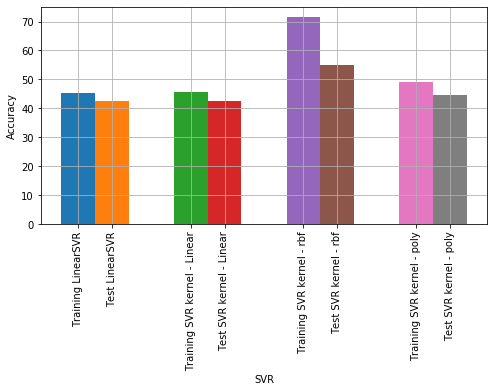

In [80]:
fig, ax = plt.subplots(figsize=(8,4))
width = 0.3
plt.xlabel('SVR')
plt.ylabel('Accuracy')
outer_labels = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
inner_label = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
list_1 = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_1)
for j in range(0,4,1) :
    ax.set_xticklabels(outer_labels,rotation=90)
    ax.set_xticklabels(inner_label,rotation=90)
train_accuracylist=[45.38,45.57,71.57,49.05]
test_accuracylist=[42.42,42.59,55.01,44.76]
for i in range(0,4,1) :
    ax.bar(i,train_accuracylist[i],width)
    ax.bar(i+width,test_accuracylist[i],width)
plt.grid()

# Compairing Model before applying PCA technique and after applying PCA technique

In [81]:
#Index Levels
outer_row= ['Before PCA','Before PCA','After PCA','After PCA']
inner_row = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
grn_level = list(zip(outer_row,inner_row))
grn_level = pd.MultiIndex.from_tuples(grn_level)

In [82]:
#train and test accuracy score of the models as observed before and after PCA
data_subset = np.array([(0.5935,0.5900,0.6514,0.5935,0.5894,0.3634,0.8042,0.5825,0.5612),
                     (0.5582,0.5581,0.5782,0.5585,0.5567,0.3875,0.5161,0.5425,0.5212),
                     (0.4594,0.5509,0.6375,0.4594,0.4253,0.4481,0.6782,0.4557,0.4498),
                     (0.4365,0.5029,0.5246,0.4365,0.4066,0.4144,0.5401,0.4259,0.4237)])

In [83]:
data_df = pd.DataFrame(data_subset,index=grn_level,columns=['Linear Regression','Polynomial Regressor','KNN Regressor',
                                                       'Ridge Regressor','Lasso Regressor','Linear SVR','SVM - RBF Kernel','SVM - Linear Kernel','SVM - Poly Kernel'])

# Comparison Table for our Model

In [84]:
import seaborn as sns

cm = sns.light_palette("Purple", as_cmap=True)

s = data_df.style.background_gradient(cmap='tab20b')
s


# Observations

### It is observed from the above steps PCA reduce the dimenstionality from 25 to 8 . Primary reason for using PCA is that it decrease time complexity of our model.Furthermore,Computation time decrease but as a penalty accuracy of the model decreases.If we refer out comparison table above before PCA model accuracy and after PCA accuracy we can find out that majority of our model performed well before PCA  and few of the model accuracy are well in after PCA.Therefore we will go ahead with before PCA model though it has higher dimensionality but accuracy is better.

# Deep Learning Model - Regression: Neural Networks

In [86]:
#install the packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [87]:
'''
Steps  for creating Neural Network using Keras Classifier

'''

# Step 1:Create model
model = Sequential()
# Defining Input layer
model.add(Dense(24, input_dim = 25, activation = 'relu'))
# Defining Hidden layer
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
#Output layer
model.add(Dense(1, kernel_initializer='normal',activation = 'sigmoid'))

# Step 2: Build the computational graph - compile
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model.fit(X_train, y_train, epochs = 30, batch_size = 50)

Epoch 1/30
3591/3591 [==============================] - 1s 207us/step - loss: 3.9610 - mean_absolute_error: 3.9610
Epoch 2/30
3591/3591 [==============================] - 0s 70us/step - loss: 3.6922 - mean_absolute_error: 3.6922
Epoch 3/30
3591/3591 [==============================] - 0s 68us/step - loss: 3.6915 - mean_absolute_error: 3.6915
Epoch 4/30
3591/3591 [==============================] - 0s 70us/step - loss: 3.6914 - mean_absolute_error: 3.6914
Epoch 5/30
3591/3591 [==============================] - 0s 69us/step - loss: 3.6914 - mean_absolute_error: 3.6914
Epoch 6/30
3591/3591 [==============================] - 0s 78us/step - loss: 3.6914 - mean_absolute_error: 3.6914
Epoch 7/30
3591/3591 [==============================] - 0s 78us/step - loss: 3.6914 - mean_absolute_error: 3.6914
Epoch 8/30
3591/3591 [==============================] - 0s 79us/step - loss: 3.6914 - mean_absolute_error: 3.6914
Epoch 9/30
3591/3591 [==============================] - 0s 81us/step - loss: 3.6914 - m

In [88]:
# Summarize Result
loss_and_metrics = model.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

1198/1198 [==============================] - 0s 67us/step
Test Loss 3.749836247433008
Test Accuracy 3.7498362064361572
